In [41]:
#Importation librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import time

In [42]:
#Importation de jeu de données :
data=pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t', header=0, encoding='utf-8', low_memory=False)

In [75]:
data_food=data.copy() 

In [76]:
#(Nombre de lignes, Nombre de colonnes)

data_food.shape

(1821081, 186)

In [77]:
#Pourcentage de données manquantes:

percent=round(100*(data.isnull().sum().sum())/(len(data.axes[1])*len(data.axes[0])))
print(str(percent)+" % données manquantes")
    

80 % données manquantes


In [78]:
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows",2000)

In [79]:
data_food.iloc[0:5]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [80]:
# I-Nettoyage des colonnes et lignes

In [81]:
#I-1-Traitement des colonnes :

In [82]:
#Données manquantes dans chaque colonne
def data_null(data):
    df_null=data.isnull().sum().sort_values()
    print(df_null)
data_null(data_food)    

code                                                0
url                                                 0
created_t                                           0
created_datetime                                    0
last_modified_t                                     0
last_modified_datetime                              0
states                                              0
states_tags                                         0
states_en                                           0
creator                                             4
pnns_groups_2                                     664
countries                                        5590
countries_tags                                   5595
countries_en                                     5595
pnns_groups_1                                   17351
product_name                                    78394
energy_100g                                    375476
proteins_100g                                  382498
fat_100g                    

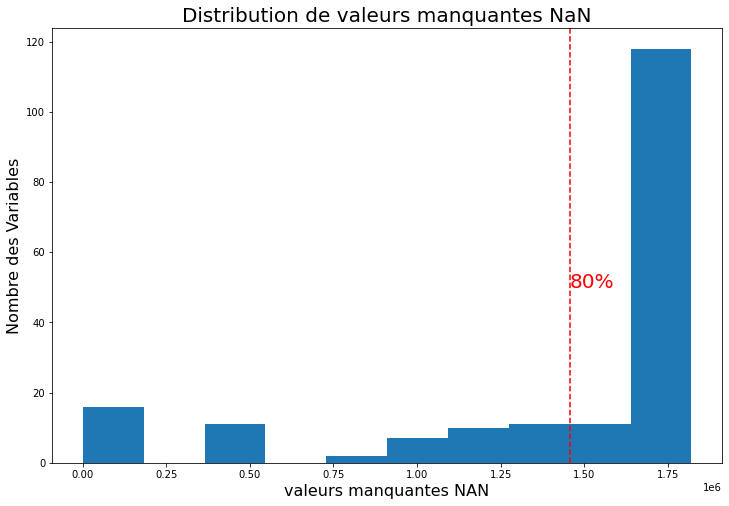

In [83]:
#la distribution des valeurs manquantes :

data_food.isnull().sum().sort_values().plot(kind='hist', figsize=(12,8))
plt.title('Distribution de valeurs manquantes NaN', fontsize = 20)
plt.xlabel('valeurs manquantes NAN',fontsize = 16)
plt.ylabel('Nombre des Variables',fontsize = 16)
plt.axvline(x=data_food.shape[0]*0.8,color='red',linestyle='--') 
plt.text(data_food.shape[0]*0.8, 50, '80%', color = 'red', fontsize = 20)

plt.show()

In [84]:
#Supprimer les colonnes avec plus de 80% de données manquantes
data_food2=data_food.dropna(axis=1,thresh=len(data_food)*(1-percent/100),how=all)
        

In [85]:
#Il reste 57 colonnes
data_food2.shape 

(1821081, 57)

In [86]:
#Pourcentage de données manquantes:

percent=round(100*(data_food2.isnull().sum().sum())/(len(data_food2.axes[1])*len(data_food2.axes[0])))
print(str(percent)+" % données manquantes")

38 % données manquantes


In [87]:
#Données manquantes dans chaque colonne
data_null(data_food2)


code                                             0
url                                              0
created_t                                        0
created_datetime                                 0
last_modified_t                                  0
last_modified_datetime                           0
states                                           0
states_tags                                      0
states_en                                        0
creator                                          4
pnns_groups_2                                  664
countries                                     5590
countries_tags                                5595
countries_en                                  5595
pnns_groups_1                                17351
product_name                                 78394
energy_100g                                 375476
proteins_100g                               382498
fat_100g                                    383592
carbohydrates_100g             

In [88]:
#Types des Variables
data_food2.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                    int64
created_datetime                            object
last_modified_t                              int64
last_modified_datetime                      object
product_name                                object
quantity                                    object
brands                                      object
brands_tags                                 object
categories                                  object
categories_tags                             object
categories_en                               object
labels                                      object
labels_tags                                 object
labels_en                                   object
countries                                   object
countries_tags                              object
countries_en                   

In [89]:
#I-2-Traitement des lignes et  doublons

In [90]:

#Supprimer les lignes contient NaN seulement :

data_food2=data_food2.dropna(axis=0,how="all")


In [91]:
#le Nutriscore est la variable le plus important
#Les données nutritionnelles pour calculer le Nutriscore sont suffixées avec _100g  
# supprimer les produits ayant toutes ces données manquantes 


liste=[]
for col in data_food2.columns:
      if '_100g' in col:
        liste.append(col)
        data_nutrition = data_food2[liste] # jeu de données avec les informations nutritionnelles seulement

data_nutrition.sample(5)


,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
915683,234.0,994.0,1.0,0.20,48.0,2.0,2.7,7.0,1.00,0.400,0.0
949396,25.0,105.0,0.0,0.00,6.1,5.9,NaN,0.5,NaN,NaN,NaN
626494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329611,4.0,17.0,0.0,0.00,0.5,0.5,NaN,0.5,0.00,0.000,NaN
557639,269.0,1125.0,24.2,8.67,4.0,3.0,NaN,8.7,2.26,0.904,21.0


In [92]:
print("Le Nb des lignes avec de nutriments complètement vides est: " +str(data_nutrition.isnull().all(axis=1).sum()))

Le Nb des lignes avec de nutriments complètement vides est: 343642


In [93]:
#supprimant maintenant ces lignes de notre jeu de données

data_food3=data_food2[data_nutrition.notnull().any(axis=1)]

In [94]:
data_food3.shape

(1477439, 57)

In [95]:
#Pourcentage de données manquantes:

percent=round(100*(data_food3.isnull().sum().sum())/(len(data_food3.axes[1])*len(data_food3.axes[0])))
print(str(percent)+" % données manquantes")

33 % données manquantes


In [96]:
data_food3.iloc[0:10]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,874.9,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.10,0.840,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",Delois france,fr:delois-france,fr:delois-france,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",60.0,b,en:mustards,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840,18.0
6,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN
7,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mi

In [97]:
data_food3.reset_index(inplace=True, drop=True)

In [98]:
data_food4=data_food3.copy()

In [99]:
data_food4.shape

(1477439, 57)

In [100]:
#supprimer les doublons
data_food4.drop_duplicates(inplace=True)

In [101]:
data_food4.shape

(1477439, 57)

In [102]:
#Supprimer les doublons de code
data_food4.drop_duplicates(subset ="code", keep = 'first', inplace=True)

In [103]:
data_food4.shape

(1477436, 57)

In [104]:
#Supprimer les produits qui n'ont pas de product_name

print(str(data_food4['product_name'].isnull().sum())+" produits sans product_name")

7684 produits sans product_name


In [105]:
data_food4['product_name'].replace('', np.nan, inplace=True)

data_food4.dropna(subset=['product_name'], inplace=True)

In [106]:
data_food4.shape

(1469752, 57)

In [107]:
#traitement des variables de catégories de produits  parsque le fruits-vegetables-nuts_100g 
#(necessaire pour calculer le Nutriscore) 
# est un peu renseigné dans le jeu des données et il était supprimer).

data_food5=data_food4.copy()

data_food5[['pnns_groups_1','pnns_groups_2','main_category_en',"categories","categories_en",
            "main_category","categories_tags",]].sample(100)


,pnns_groups_1,pnns_groups_2,main_category_en,categories,categories_en,main_category,categories_tags
270480,Fish Meat Eggs,Meat,Chicken breasts,"Viandes, Volailles, Poulets, Filets de poulet","Meats,Poultries,Chickens,Chicken breasts",en:chicken-breasts,"en:meats,en:poultries,en:chickens,en:chicken-b..."
1195362,unknown,unknown,NaN,NaN,NaN,NaN,NaN
180896,Composite foods,Pizza pies and quiche,Pizzas,"Meals, Pizzas pies and quiches, Pizzas","Meals,Pizzas pies and quiches,Pizzas",en:pizzas,"en:meals,en:pizzas-pies-and-quiches,en:pizzas"
719349,unknown,unknown,NaN,NaN,NaN,NaN,NaN
507977,Fish Meat Eggs,Processed meat,White hams,"Viandes, Charcuteries, Jambons, Jambons blancs","Meats,Prepared meats,Hams,White hams",en:white-hams,"en:meats,en:prepared-meats,en:hams,en:white-hams"
111062,Milk and dairy products,Cheese,Cheeses,"Dairies, Fermented foods, Fermented milk produ...","Dairies,Fermented foods,Fermented milk product...",en:cheeses,"en:dairies,en:fermented-foods,en:fermented-mil..."
5004,Sugary snacks,Biscuits and cakes,Cakes,"Biscuits and cakes, Cakes","Biscuits and cakes,Cakes",en:cakes,"en:biscuits-and-cakes,en:cakes"
1376805,Fat and sauces,Dressings and sauces,Fried tomato sauces,"Epicerie, Sauces, Sauces tomate, Sauces tomate...","Groceries,Sauces,Tomato sauces,Fried tomato sa...",en:fried-tomato-sauces,"en:groceries,en:sauces,en:tomato-sauces,en:fri..."
272046,unknown,unknown,NaN,NaN,NaN,NaN,NaN
512780,unknown,unknown,NaN,NaN,NaN,NaN,NaN


In [108]:
data_food5.shape

(1469752, 57)

In [111]:
#supprimer les lignes  qui ne contienent aucune indication de catégorie
data_food6=data_food5[~((data_food5.pnns_groups_1 == "unknown") & (data_food5.pnns_groups_2 == "unknown") &
               (data_food5.main_category_en.isnull()) & (data_food5.categories.isnull()) &
              (data_food5.categories_en.isnull()) & (data_food5.main_category.isnull())&
               (data_food5.categories_tags.isnull()))]

In [113]:
data_food6.shape

(770946, 57)

In [35]:
#I-3-les articles vendus en France ( applications en lien avec l'alimentation 
# pour L'agence "Santé publique France")

In [ ]:
#filtrer les produits par pays :

In [36]:

data_food6['countries_tags'].value_counts()

en:united-states                                                                                                                                            284563
en:france                                                                                                                                                   268386
en:spain                                                                                                                                                     53871
en:germany                                                                                                                                                   32036
en:italy                                                                                                                                                     11466
                                                                                                                                                             ...  
en:france,en:french-po

In [37]:
data_food6['countries'].value_counts()

United States                       279849
France                              221956
España                               31199
en:fr                                26413
Deutschland                          16318
                                     ...  
Belgium,France,Switzerland,Italy         1
France, Portugal, en:spain               1
en:PE                                    1
France, Germany, en:morocco              1
France, en:croatia                       1
Name: countries, Length: 8334, dtype: int64

In [38]:
data_food6['countries_en'].value_counts()

United States                                  284563
France                                         268386
Spain                                           53871
Germany                                         32036
Italy                                           11466
                                                ...  
Franca                                              1
Denmark,Finland,France,Norway,Poland,Sweden         1
France,Germany,Luxembourg,En                        1
Syria                                               1
Austria,Belgium,France,Portugal                     1
Name: countries_en, Length: 3494, dtype: int64

In [39]:
#countries_en et countries_tags renvoient le même nombre de lignes : 268386

In [317]:
#les produits en France 

df_france= data_food6[data_food6['countries_en'].str.contains("France")==True].copy()

In [318]:
df_france.shape

(315626, 57)

In [319]:
#Pourcentage de données manquantes:

percent=round(100*(df_france.isnull().sum().sum())/(len(df_france.axes[1])*len(df_france.axes[0])))
print(str(percent)+" % données manquantes")

18 % données manquantes


In [320]:
#Données manquantes dans chaque colonne
data_null(df_france)


code                                            0
countries                                       0
main_category_en                                0
pnns_groups_2                                   0
main_category                                   0
categories_en                                   0
categories_tags                                 0
categories                                      0
states_en                                       0
states_tags                                     0
states                                          0
product_name                                    0
last_modified_datetime                          0
last_modified_t                                 0
created_datetime                                0
created_t                                       0
url                                             0
countries_tags                                  0
countries_en                                    0
creator                                         1


In [321]:
#I-4-traitement des catégories encore une fois dans le jeu des données  France

print(df_france['pnns_groups_1'].unique())

['Fat and sauces' 'unknown' 'Composite foods' 'Sugary snacks'
 'Fruits and vegetables' 'Milk and dairy products' 'Fish Meat Eggs'
 'Cereals and potatoes' 'Salty snacks' 'Beverages' 'sugary-snacks' nan
 'fruits-and-vegetables' 'cereals-and-potatoes' 'salty-snacks']


In [322]:
# pnns_groups_1 nous interesse puisqu'il contient moins de modalités par rapport aux autres colonnes de categorie
pnns_groups_1_values=df_france.pnns_groups_1.value_counts()
print(pnns_groups_1_values)

Sugary snacks              56018
Fish Meat Eggs             46085
Milk and dairy products    36099
unknown                    32258
Cereals and potatoes       28068
Composite foods            25858
Beverages                  23604
Fat and sauces             21618
Salty snacks               19252
Fruits and vegetables      18404
sugary-snacks               3681
fruits-and-vegetables       1943
cereals-and-potatoes          13
salty-snacks                   2
Name: pnns_groups_1, dtype: int64


In [323]:
#Corrections des catégories sugary-snacks, fruits-and-vegetables, cereals-and-potatoes, salty-snacks

df_france["pnns_groups_1"] = df_france["pnns_groups_1"].str.lower().str.replace('-', ' ')

In [324]:
print(df_france['pnns_groups_1'].unique())

['fat and sauces' 'unknown' 'composite foods' 'sugary snacks'
 'fruits and vegetables' 'milk and dairy products' 'fish meat eggs'
 'cereals and potatoes' 'salty snacks' 'beverages' nan]


In [325]:
pnns_groups_1_values=df_france.pnns_groups_1.value_counts()
print(pnns_groups_1_values)

sugary snacks              59699
fish meat eggs             46085
milk and dairy products    36099
unknown                    32258
cereals and potatoes       28081
composite foods            25858
beverages                  23604
fat and sauces             21618
fruits and vegetables      20347
salty snacks               19254
Name: pnns_groups_1, dtype: int64


In [326]:
#même traitement pour pnns_groups_2
print(df_france['pnns_groups_2'].unique())

['Dressings and sauces' 'unknown' 'One-dish meals' 'Biscuits and cakes'
 'Fruits' 'Cheese' 'Meat' 'Bread' 'Fish and seafood'
 'Salty and fatty products' 'Fruit juices' 'Sweets' 'Fats'
 'Dairy desserts' 'Pizza pies and quiche' 'Sweetened beverages'
 'Unsweetened beverages' 'Nuts' 'Cereals' 'Appetizers' 'Dried fruits'
 'pastries' 'Vegetables' 'Processed meat' 'Breakfast cereals' 'Sandwiches'
 'Legumes' 'Milk and yogurt' 'Teas and herbal teas and coffees' 'Soups'
 'Potatoes' 'Artificially sweetened beverages' 'Eggs' 'Chocolate products'
 'Plant-based milk substitutes' 'Offals' 'Waters and flavored waters'
 'Alcoholic beverages' 'vegetables' 'Ice cream' 'Fruit nectars' 'fruits'
 'Pizza pies and quiches' 'legumes' 'cereals' 'nuts']


In [327]:
# Corrections des catégories de pnns_groups_2
# on va l'utiliser dans notre application

df_france["pnns_groups_2"] = df_france["pnns_groups_2"].str.lower().str.replace('-', ' ')

In [328]:
pnns_groups_2_values=df_france.pnns_groups_2.value_counts()
print(pnns_groups_2_values)

unknown                             32258
biscuits and cakes                  25138
sweets                              22965
one dish meals                      21300
processed meat                      18696
cheese                              18308
dressings and sauces                14081
meat                                13933
cereals                             12806
fish and seafood                    11398
milk and yogurt                      9868
salty and fatty products             9374
vegetables                           9165
sweetened beverages                  8455
chocolate products                   7915
fats                                 7537
bread                                6358
appetizers                           6161
fruits                               5736
fruit juices                         5403
breakfast cereals                    4415
dairy desserts                       4353
nuts                                 3719
pastries                          

In [329]:
########################################################################################################
########################################################################################################
########################################################################################################
########################################################################################################

In [330]:
#II-Traitement de valeurs aberrantes 

In [331]:
df_france.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,3.156260e+05,3.156260e+05,72737.000000,182304.000000,182304.000000,182304.000000,286623.000000,167779.000000,223928.000000,2.869570e+05,3.112690e+05,309453.000000,309115.000000,309351.000000,309414.000000,110627.000000,310066.000000,305887.000000,305886.000000,286626.000000
mean,1.515071e+09,1.589590e+09,114.831517,1.708246,0.049577,0.120239,9.500825,3.373974,47.242265,2.876456e+02,1.189919e+03,15.216883,5.725614,25.512583,12.900376,2.877221,9.282739,1.284039,0.513820,9.500925
std,5.243452e+07,3.276547e+07,674.716305,2.407570,0.220479,0.410476,8.765790,0.978923,26.666942,5.449393e+03,2.196850e+04,165.006396,40.300018,212.063203,23.030699,4.611081,310.801798,46.709438,18.684043,8.765808
min,1.328021e+09,1.333873e+09,0.000000,0.000000,0.000000,0.000000,-15.000000,1.000000,-23.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1.492257e+09,1.573556e+09,28.000000,0.000000,0.000000,0.000000,2.000000,3.000000,29.000000,1.110000e+02,4.600000e+02,1.000000,0.200000,2.000000,0.600000,0.100000,1.400000,0.050000,0.020000,2.000000
50%,1.521553e+09,1.600427e+09,75.000000,1.000000,0.000000,0.000000,10.000000,4.000000,42.000000,2.540000e+02,1.050000e+03,8.000000,2.000000,12.000000,3.100000,1.600000,6.200000,0.544000,0.218200,10.000000
75%,1.543589e+09,1.614039e+09,135.000000,3.000000,0.000000,0.000000,16.000000,4.000000,69.000000,3.990000e+02,1.661000e+03,23.000000,8.200000,50.000000,16.600000,3.600000,13.000000,1.300000,0.520000,16.000000
max,1.623091e+09,1.623113e+09,100000.000000,30.000000,2.000000,5.000000,40.000000,4.000000,125.000000,2.910000e+06,1.220000e+07,91200.000000,21900.000000,117000.000000,6880.000000,100.000000,173000.000000,25000.000000,10000.000000,40.000000


In [332]:
#En regardant les min et max on constate qu'il y a des valeurs aberrantes 
#nutrition-score-fr_100g contient pas des valeurs aberrantes, il varie entre -15 et 40

In [333]:
#II-1-Traitement de valeurs aberrantes :

serving_quantity                              AxesSubplot(0.125,0.772143;0.168478x0.107857)
additives_n                                AxesSubplot(0.327174,0.772143;0.168478x0.107857)
ingredients_from_palm_oil_n                AxesSubplot(0.529348,0.772143;0.168478x0.107857)
ingredients_that_may_be_from_palm_oil_n    AxesSubplot(0.731522,0.772143;0.168478x0.107857)
nutriscore_score                              AxesSubplot(0.125,0.642714;0.168478x0.107857)
nova_group                                 AxesSubplot(0.327174,0.642714;0.168478x0.107857)
ecoscore_score_fr                          AxesSubplot(0.529348,0.642714;0.168478x0.107857)
energy-kcal_100g                           AxesSubplot(0.731522,0.642714;0.168478x0.107857)
energy_100g                                   AxesSubplot(0.125,0.513286;0.168478x0.107857)
fat_100g                                   AxesSubplot(0.327174,0.513286;0.168478x0.107857)
saturated-fat_100g                         AxesSubplot(0.529348,0.513286;0.16847

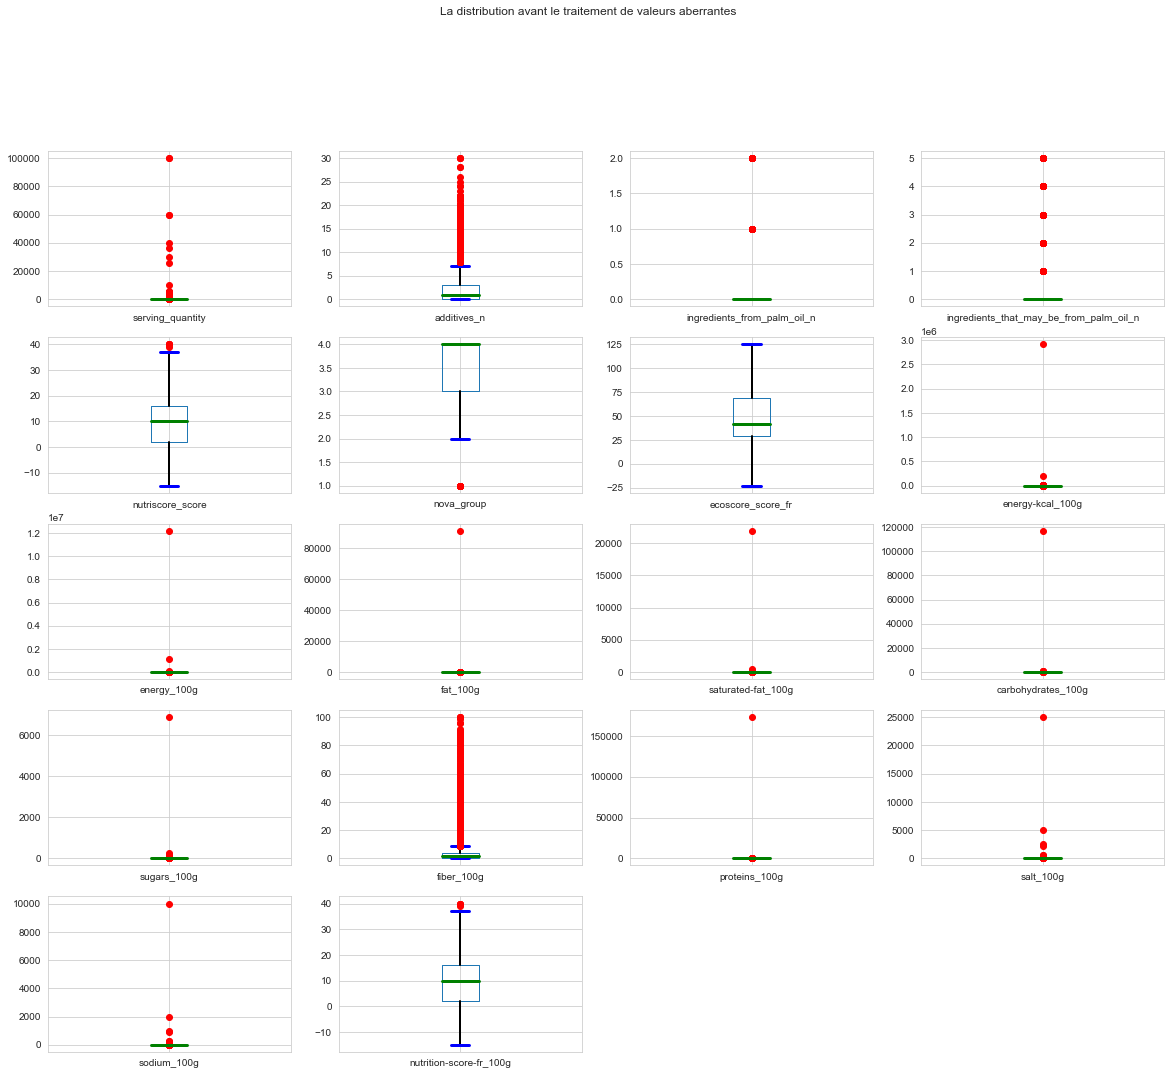

In [334]:
#Visualisation graphique de la distribution de chaque Variable avant le traitement :

df_france.select_dtypes(include=float).plot(kind="box",subplots=True,sym="ro",
                                            whiskerprops = {'color':'k','linewidth':2,'linestyle':'solid'},
                                            capprops={'color': 'blue', 'linewidth': 3, 'linestyle': 'solid'},
                                            medianprops = {'color':'green','linewidth': 3, 'linestyle': 'solid'},
                                            title="La distribution avant le traitement de valeurs aberrantes",
                                            figsize=(20,20),layout=(6,4)) 


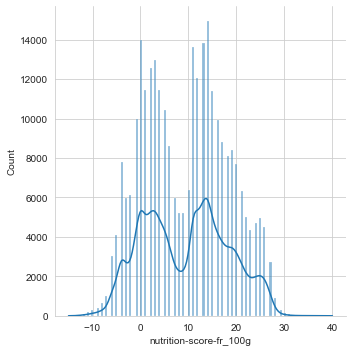

In [335]:
#regarder la distrubtion des scores de nutrition-score-fr_100g:

sns.displot(df_france[df_france['nutrition-score-fr_100g'].notnull()]['nutrition-score-fr_100g'], kde=True)


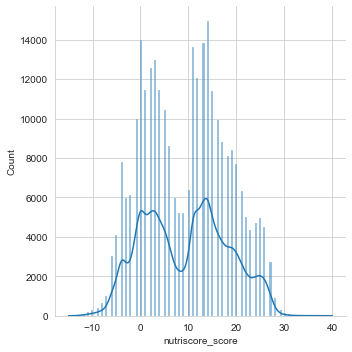

In [336]:
#regarder la distrubtion des scores de nutriscore_score:

sns.displot(df_france[df_france['nutriscore_score'].notnull()]['nutriscore_score'], kde=True)


In [337]:
#on remarque que la distribution de cette variable ne suit pas une loi normale

In [338]:
#Traiter les valeurs aberrantes par la méthode interquartile :


for col in df_france.columns:
    if col!="nutrition-score-fr_100g" and col!="nutriscore_score":
                              # nutrition-score-fr_100g ne contient pas de valeurs aberrantes
        try:
            Q1=df_france[col].quantile(0.25)
            Q3=df_france[col].quantile(0.75)
            EI=Q3-Q1 #(écart interquartile)
            maximum=Q3+1.5*EI   #l’échelle est prise comme 1,5 
            minimum=Q1-1.5*EI   #toute donnée située au-delà de 2,7σ de la moyenne (μ), de part et d’autre
                                #doit être considérée comme aberrante. 
                                #Et cette plage de décision est la plus proche de ce que la distribution gaussienne 
                                #nous dit, c’est-à-dire 3σ
            # Q1 - 1.5 * IQR= -2.7σ et Q3 + 1.5 * IQR =  2.7σ
            
            #Tout point de données inférieur à la limit inférieure 
            #ou supérieur à la limite supérieure est considéré comme une valeur aberrante
            
            df_france[col] = df_france[col].apply(lambda x: maximum if x > maximum else x)
            df_france[col] = df_france[col].apply(lambda x: minimum if x < minimum else x)
            df_france[col] = df_france[col].apply(lambda x: 0 if x < 0  else x)#supprimer les valeurs négatives 
                                                                               #si elles existaient
        except:
            continue          

In [339]:
df_france.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,3.156260e+05,3.156260e+05,72737.000000,182304.000000,182304.0,182304.0,286623.000000,167779.000000,223928.000000,286957.000000,311269.000000,309453.000000,309115.000000,309351.000000,309414.000000,110627.000000,310066.000000,305887.000000,305886.000000,286626.000000
mean,1.516970e+09,1.590591e+09,98.432299,1.620568,0.0,0.0,9.500825,3.430900,47.372571,274.987484,1140.535070,13.919422,5.147419,25.127689,10.811436,2.458675,8.529176,0.821594,0.328645,9.500925
std,4.766085e+07,2.924256e+07,89.032189,2.083163,0.0,0.0,8.765790,0.844529,26.415628,193.231379,801.657848,15.464705,6.432692,27.078733,14.160810,2.671187,8.246861,0.911675,0.364676,8.765808
min,1.415259e+09,1.512831e+09,0.000000,0.000000,0.0,0.0,-15.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1.492257e+09,1.573556e+09,28.000000,0.000000,0.0,0.0,2.000000,3.000000,29.000000,111.000000,460.000000,1.000000,0.200000,2.000000,0.600000,0.100000,1.400000,0.050000,0.020000,2.000000
50%,1.521553e+09,1.600427e+09,75.000000,1.000000,0.0,0.0,10.000000,4.000000,42.000000,254.000000,1050.000000,8.000000,2.000000,12.000000,3.100000,1.600000,6.200000,0.544000,0.218200,10.000000
75%,1.543589e+09,1.614039e+09,135.000000,3.000000,0.0,0.0,16.000000,4.000000,69.000000,399.000000,1661.000000,23.000000,8.200000,50.000000,16.600000,3.600000,13.000000,1.300000,0.520000,16.000000
max,1.620586e+09,1.623113e+09,295.500000,7.500000,0.0,0.0,40.000000,4.000000,125.000000,831.000000,3462.500000,56.000000,20.200000,122.000000,40.600000,8.850000,30.400000,3.175000,1.270000,40.000000


In [340]:
#On voit maintenant que les valeurs de minimum et maximum sont plus cohérentes avec les définitions des Variables 
# aussi les valeurs des médianes et écarts-type sont plus représentatives

created_t                                     AxesSubplot(0.125,0.772143;0.168478x0.107857)
last_modified_t                            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
serving_quantity                           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
additives_n                                AxesSubplot(0.731522,0.772143;0.168478x0.107857)
ingredients_from_palm_oil_n                   AxesSubplot(0.125,0.642714;0.168478x0.107857)
ingredients_that_may_be_from_palm_oil_n    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
nutriscore_score                           AxesSubplot(0.529348,0.642714;0.168478x0.107857)
nova_group                                 AxesSubplot(0.731522,0.642714;0.168478x0.107857)
ecoscore_score_fr                             AxesSubplot(0.125,0.513286;0.168478x0.107857)
energy-kcal_100g                           AxesSubplot(0.327174,0.513286;0.168478x0.107857)
energy_100g                                AxesSubplot(0.529348,0.513286;0.16847

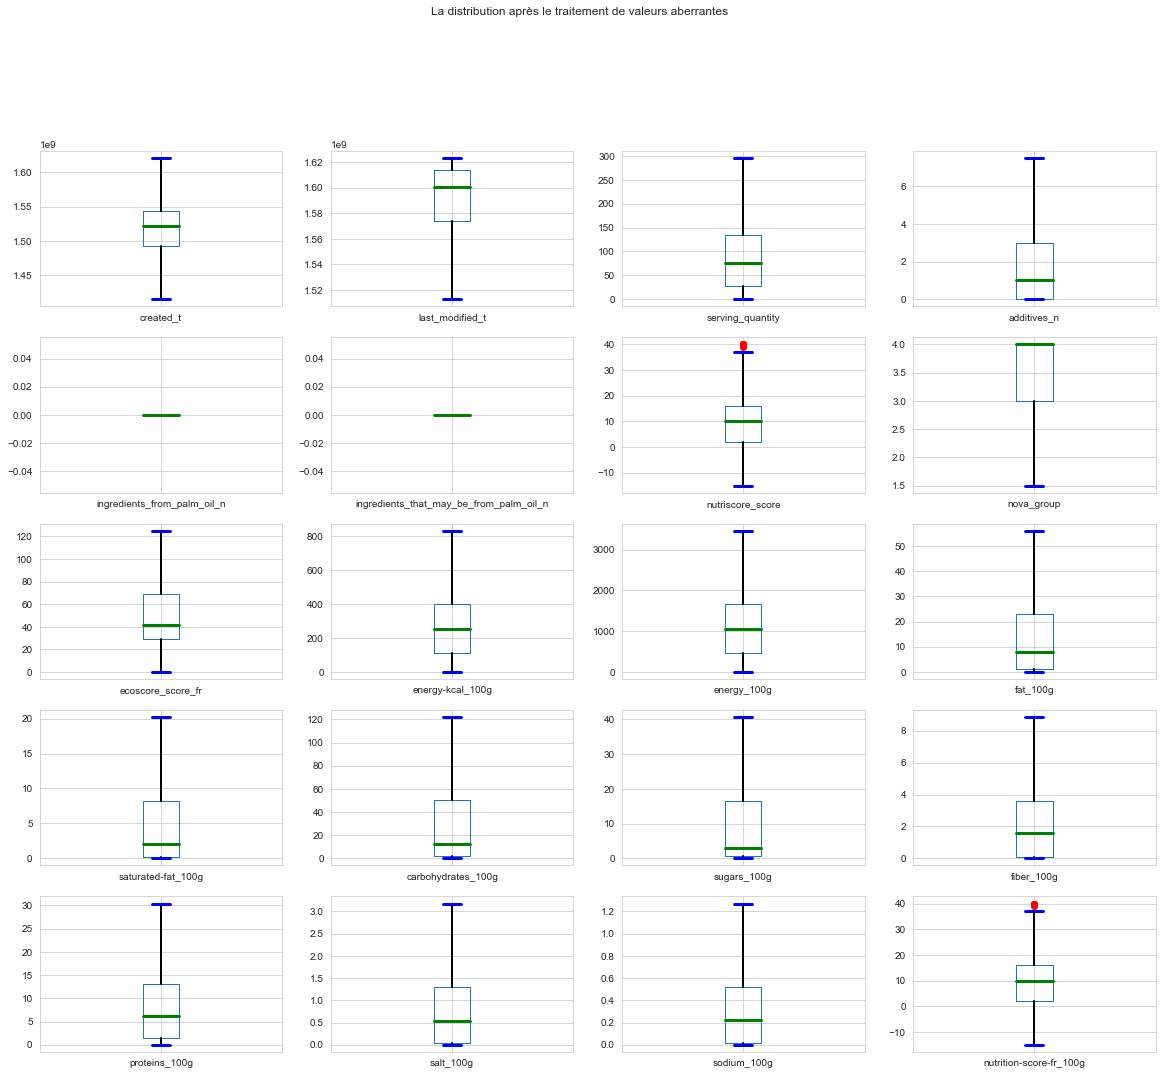

In [341]:
#Visualisation de la distribution  après le traitement de valeurs aberrantes :

df_france.select_dtypes(include=float).plot(kind="box",subplots=True,sym="ro",
                                            whiskerprops = {'color':'k','linewidth':2,'linestyle':'solid'},
                                            capprops={'color': 'blue', 'linewidth': 3, 'linestyle': 'solid'},
                                            medianprops = {'color':'green','linewidth': 3, 'linestyle': 'solid'},
                                            title="La distribution après le traitement de valeurs aberrantes",
                                            figsize=(20,20),layout=(6,4)) 


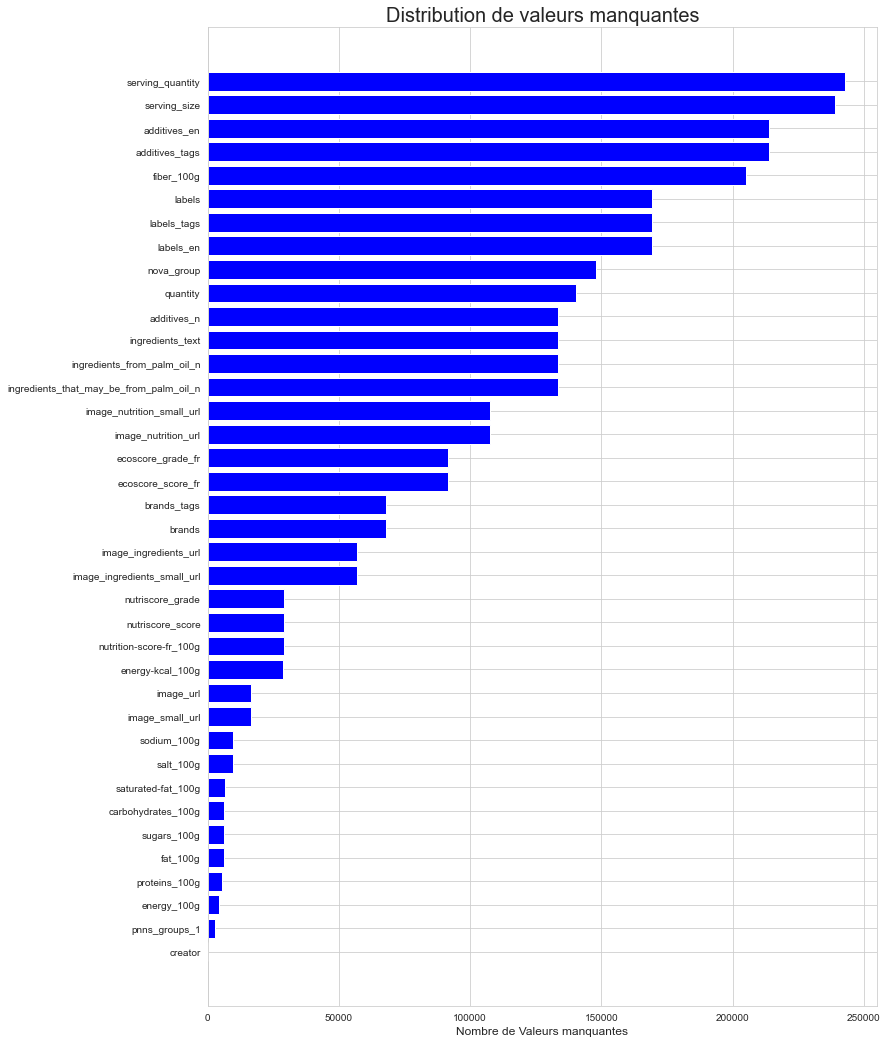

In [342]:
#La distribution de valeurs manquantes :

missing_df = df_france.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Nombre de Valeurs manquantes",fontsize = 12)
ax.set_title("Distribution de valeurs manquantes",fontsize = 20)
plt.show()

In [343]:
#les Variables ne sont pas interessantes pour l'application pour le moment sont :

variables_deleted = ['brands','brands_tags','serving_size','nova_group','image_ingredients_small_url',
                     'categories', 'categories_tags','categories_en','ecoscore_score_fr',
                     'ecoscore_grade_fr', 'main_category',
                    'image_ingredients_url','ingredients_text','ingredients_from_palm_oil_n',
                    'ingredients_that_may_be_from_palm_oil_n','image_nutrition_url',
                     'image_nutrition_small_url',
                     'nutrition-score-fr_100g','quantity', 'url', 'creator', 'created_t',
                     'created_datetime','last_modified_t', 'last_modified_datetime','labels',
                     'labels_tags', 'labels_en', 'countries', 'countries_tags','countries_en',
                     'serving_quantity', 'additives_n', 'additives_tags','additives_en', 'states',
                     'states_tags', 'states_en']
#supprimer ces variables en gardant les variables importantes pour l'application :

df_france.drop(variables_deleted, axis=1, inplace=True)

<AxesSubplot:>

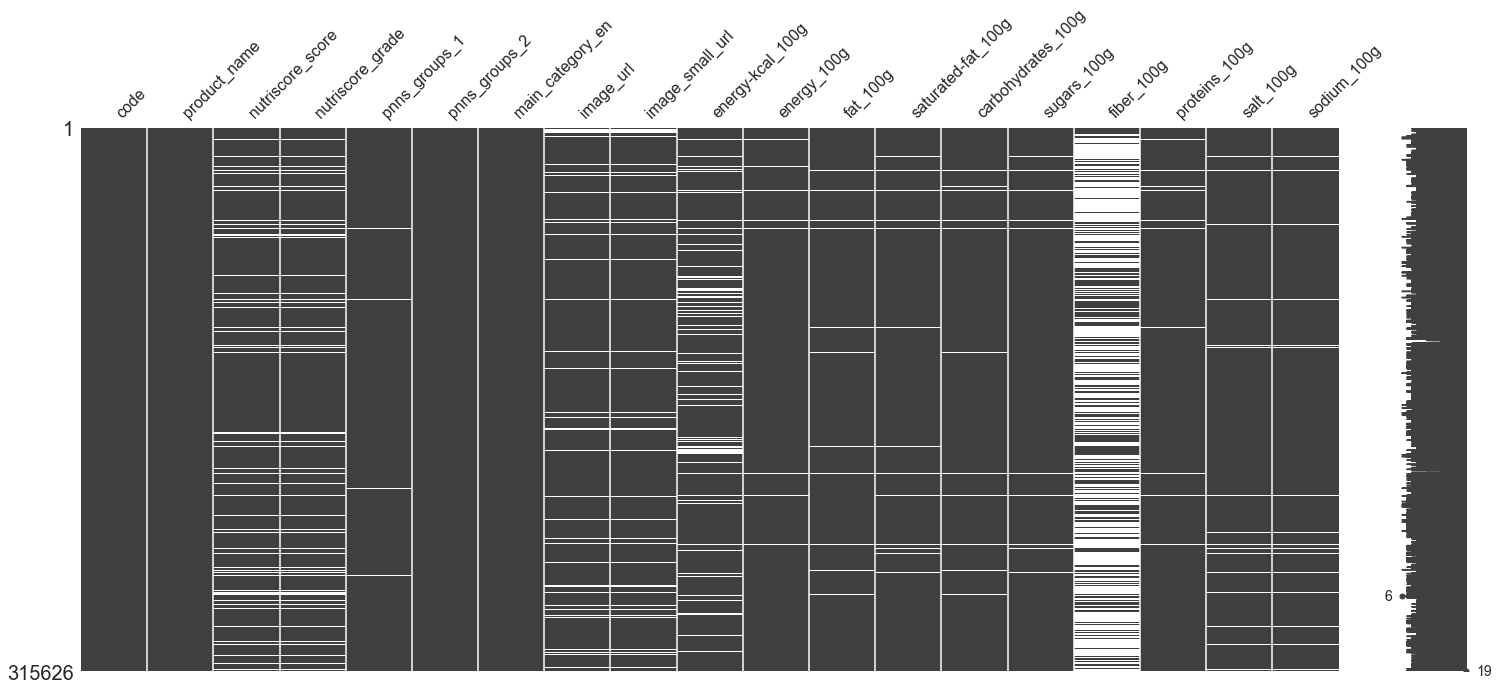

In [344]:
#Visualisation de données manquantes
msno.matrix(df_france)

In [345]:
# 1-On trouve que fibre_100 est un peu renseigné, il est important puisqu'il entre dans la formule de calcule de Nutriscore.

# Notre strategie pour la suite est de faire imputation de fibre_100 à part et les autres variables bien remplis 

#2-autre point important il manque des informations sur la variable fruits-vegetables-nuts_100g et sur
#la nature de produit (boissons ou non).

#Conclusion : on peut pas calculer les valeurs de Nutriscore en basant sur le calcul du score nutritionnel 
#des aliments, basé sur la méthode proposée par l’OfCom (Rayner et al., 2009) et respecté 
#par le Programme national nutrition santé (PNNS).

#d’où la necessité d'imputer les valeurs de nutriscore_score et nutriscore_grade


In [346]:
# II-2-Traitement de valeurs manquantes :


In [ ]:
#2-1-Traitement de valeurs manquantes des variables catégories :

In [347]:
#pendant le traitement des categories on a remarqué qu'il y a 32258 'unknow' dans pnns_groups_1 
#remplaçant ces valeurs par le mode du groupe main_category_en 

df_france['pnns_groups_1'].replace('unknown', np.nan, inplace=True)

def fast_mode(df, key_cols, value_col):
    
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')


In [348]:
df_france.loc[df_france.pnns_groups_1.isnull(), 'pnns_groups_1'] = df_france.main_category_en.map(fast_mode(df_france,['main_category_en'], 'pnns_groups_1').set_index('main_category_en').pnns_groups_1)

In [349]:
data_null(df_france)


code                       0
product_name               0
pnns_groups_2              0
main_category_en           0
energy_100g             4357
proteins_100g           5560
fat_100g                6173
sugars_100g             6212
carbohydrates_100g      6275
saturated-fat_100g      6511
salt_100g               9739
sodium_100g             9740
pnns_groups_1          12940
image_url              16477
image_small_url        16477
energy-kcal_100g       28669
nutriscore_grade       29003
nutriscore_score       29003
fiber_100g            204999
dtype: int64


In [350]:
# Il reste 12940 valeurs manquantes dans pnns_groups_1 parsque le mode d'un groupe est NaN
#supprimant ces valeurs
df_france.dropna(subset=['pnns_groups_1'], inplace=True)

In [351]:
df_france.shape

(302686, 19)

In [352]:
data_null(df_france)

code                       0
product_name               0
pnns_groups_1              0
pnns_groups_2              0
main_category_en           0
energy_100g             3202
proteins_100g           4143
fat_100g                4772
carbohydrates_100g      4845
sugars_100g             4889
saturated-fat_100g      5373
salt_100g               8445
sodium_100g             8446
image_url              15346
image_small_url        15346
nutriscore_grade       23914
nutriscore_score       23914
energy-kcal_100g       26803
fiber_100g            196475
dtype: int64


In [353]:
df_france.pnns_groups_1.value_counts()


sugary snacks              64406
fish meat eggs             47670
milk and dairy products    38928
beverages                  29535
cereals and potatoes       29308
composite foods            28229
fat and sauces             22658
fruits and vegetables      21198
salty snacks               20754
Name: pnns_groups_1, dtype: int64

In [354]:
df_france.pnns_groups_2.value_counts()

biscuits and cakes                  25138
sweets                              22965
unknown                             21337
one dish meals                      21300
processed meat                      18696
cheese                              18308
dressings and sauces                14081
meat                                13933
cereals                             12806
fish and seafood                    11398
milk and yogurt                      9868
salty and fatty products             9374
vegetables                           9165
sweetened beverages                  8455
chocolate products                   7915
fats                                 7537
bread                                6358
appetizers                           6161
fruits                               5736
fruit juices                         5403
breakfast cereals                    4415
dairy desserts                       4353
nuts                                 3719
pastries                          

In [355]:
#pendant le traitement des categories on a remarqué qu'il y a 32258 'unknow' dans pnns_groups_2 
#remplaçant ces valeurs par le mode du groupe main_category_en 

df_france['pnns_groups_2'].replace('unknown', np.nan, inplace=True)

In [356]:
df_france.loc[df_france.pnns_groups_2.isnull(), 'pnns_groups_2'] = df_france.main_category_en.map(fast_mode(df_france,['main_category_en'], 'pnns_groups_2').set_index('main_category_en').pnns_groups_2)

In [357]:
data_null(df_france)

code                       0
product_name               0
pnns_groups_1              0
pnns_groups_2              0
main_category_en           0
energy_100g             3202
proteins_100g           4143
fat_100g                4772
carbohydrates_100g      4845
sugars_100g             4889
saturated-fat_100g      5373
salt_100g               8445
sodium_100g             8446
image_url              15346
image_small_url        15346
nutriscore_grade       23914
nutriscore_score       23914
energy-kcal_100g       26803
fiber_100g            196475
dtype: int64


In [358]:
df_france.shape

(302686, 19)

In [ ]:
#2-2-Traitement de valeurs manquantes des variables des images :

In [ ]:
#deux autres variables importantes pour notre application sont  "image_small_url" et "image_url"

In [359]:
# Il y a 15346 valeurs manquantes dans chacune
#supprimant ces valeurs
df_france.dropna(subset=['image_url'], inplace=True)

In [360]:
data_null(df_france)

code                       0
product_name               0
pnns_groups_1              0
pnns_groups_2              0
main_category_en           0
image_url                  0
image_small_url            0
energy_100g             3099
proteins_100g           3948
fat_100g                4467
carbohydrates_100g      4502
sugars_100g             4642
saturated-fat_100g      5048
salt_100g               7767
sodium_100g             7768
nutriscore_score       22243
nutriscore_grade       22243
energy-kcal_100g       26020
fiber_100g            186683
dtype: int64


In [361]:
df_france.shape

(287340, 19)

In [362]:
#Pourcentage de données manquantes:

percent=round(100*(df_france.isnull().sum().sum())/(len(df_france.axes[1])*len(df_france.axes[0])))
print(str(percent)+" % données manquantes")

5 % données manquantes


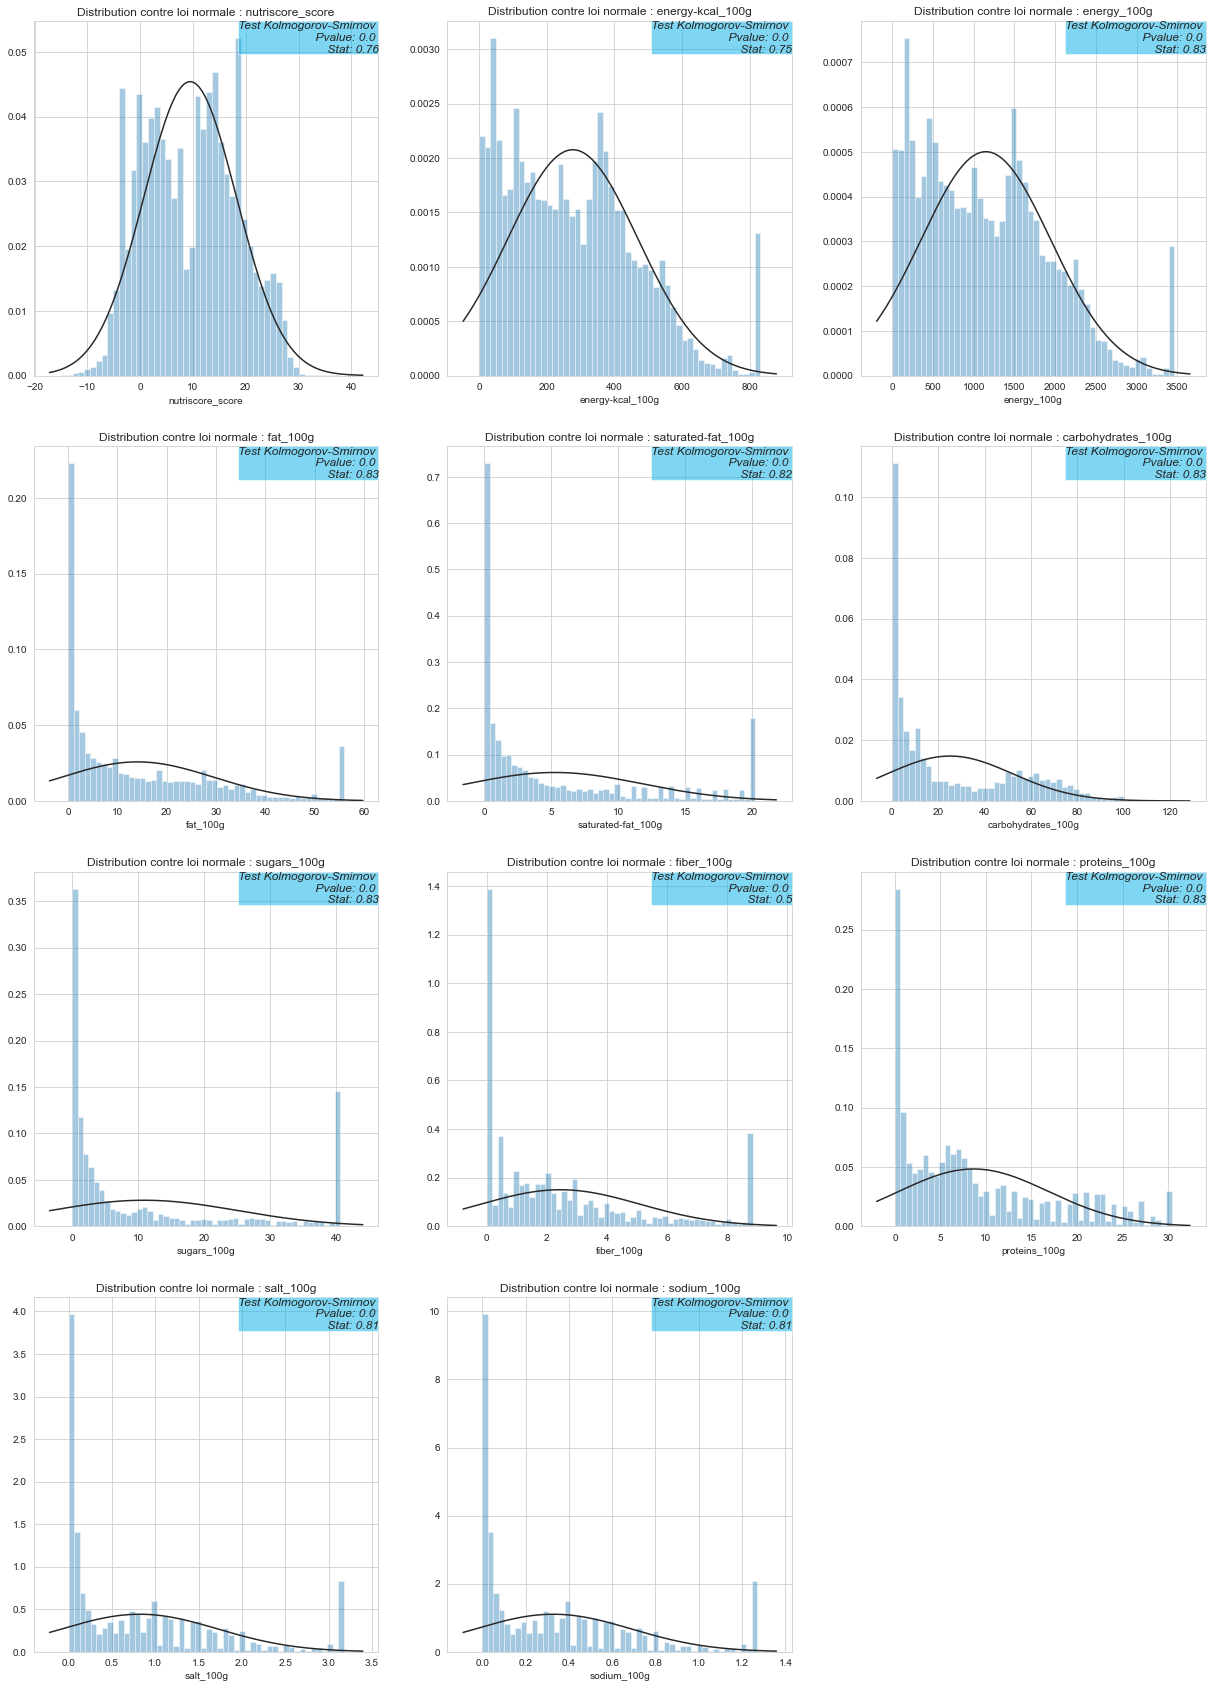

In [363]:
#regardons maintenant si la distribution de variables suivent une loi normale avant de procéder à l'étape d'imputation

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
numerical_cols = list(df_france.select_dtypes(include=["float64","int64"]).columns)
sub = 0
for i in range(len(numerical_cols)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_cols[i]
    kstest = stats.kstest(df_france[colonne].notnull(),'norm')
    ax = sns.distplot(df_france[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution contre loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

In [364]:
#les p-values sont plus petites que  le seuil de test de 5% et d'après le test de  Kolmogorov-Smirnov 
#on rejette l'hypothèse de normalité des distributions

In [ ]:
#2-3-Imputatiom (remplacement des valeurs manquantes )

In [365]:
# comme il y a seulement 5% de données manquantes el les distributions ne suivent pas la loi gaussiene, 
#on ne peut pas utiliser l'imputation par la moyenne
#donc nous allons imputer avec l'algorithme des K Nearest Neighbours (KNN) 
#il est coûter , il va prendre de temps mais il est plus fiable 
# on veut pas supprimer les valeurs manquantes cela nous permettre de garder plus des produits


#1-Convertir les valeurs non manquantes dans les colonnes categorielles en valeurs ordinales
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer()

data_imp = df_france.copy()
data_imp.reset_index(inplace=True, drop=True) 
data_imp =data_imp.drop(["code","product_name","pnns_groups_2","main_category_en","image_small_url","image_url"], axis=1)

#liste de colonnes categorielles   
cat_cols=["pnns_groups_1", "nutriscore_grade"] #les autres colonnes catégorielles 
ordinal_enc = {} #un dictionnaire              # ne contiennent pas de valeurs manquantes

for col_name in cat_cols:
    
    ordinal_enc[col_name] = OrdinalEncoder() 
 
    col = data_imp[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)

    encoded_vals = ordinal_enc[col_name].fit_transform(reshaped_vals)
    data_imp.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [366]:
%%time
#2-Imputer les valeurs manquantes dans le DataFrame ordinaL
encode_data = pd.DataFrame(np.round(KNN_imputer.fit_transform(data_imp)),columns = data_imp.columns)

Wall time: 1h 30min 55s


In [375]:
encode_data2=encode_data.copy()

In [376]:
#3-Reconvertir des valeurs ordinales en valeurs catégorielles

for col in cat_cols:
    reshaped_col = encode_data2[col].values.reshape(-1, 1)
    encode_data2[col] = ordinal_enc[col].inverse_transform(reshaped_col)

In [377]:
encode_data2.iloc[0:10]

,nutriscore_score,nutriscore_grade,pnns_groups_1,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,18.0,d,fat and sauces,224.0,936.0,8.0,2.0,29.0,22.0,0.0,5.0,3.0,1.0
1,1.0,b,composite foods,32.0,134.0,0.0,0.0,5.0,4.0,3.0,1.0,0.0,0.0
2,14.0,d,sugary snacks,381.0,1594.0,22.0,16.0,27.0,22.0,4.0,5.0,0.0,0.0
3,-2.0,a,fruits and vegetables,157.0,657.0,0.0,0.0,36.0,27.0,4.0,1.0,0.0,0.0
4,1.0,b,composite foods,143.0,598.0,13.0,1.0,4.0,1.0,5.0,2.0,0.0,0.0
5,14.0,d,milk and dairy products,397.0,1661.0,33.0,20.0,0.0,0.0,0.0,25.0,1.0,1.0
6,4.0,c,fish meat eggs,197.0,824.0,13.0,4.0,3.0,1.0,0.0,17.0,1.0,0.0
7,0.0,b,cereals and potatoes,197.0,824.0,5.0,1.0,29.0,3.0,2.0,8.0,0.0,0.0
8,-4.0,a,cereals and potatoes,160.0,669.0,2.0,0.0,25.0,1.0,2.0,10.0,0.0,0.0
9,15.0,d,fish meat eggs,253.0,1059.0,17.0,3.0,0.0,0.0,0.0,23.0,2.0,1.0


In [378]:
#Concaténation 

#df1=df_france.iloc[:,0:2]    # les 2 premières colonnes
df1=df_france.loc[:,["code","product_name","pnns_groups_2","main_category_en","image_small_url","image_url"]]
df1.reset_index(inplace=True, drop=True)  #l'initialisation de l'index est nécessaire avant la concaténation 
data_clean = pd.concat([df1,encode_data2], axis=1) 

In [379]:
data_clean.iloc[0:10]

,code,product_name,pnns_groups_2,main_category_en,image_small_url,image_url,nutriscore_score,nutriscore_grade,pnns_groups_1,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000000100,moutarde au moût de raisin,dressings and sauces,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,18.0,d,fat and sauces,224.0,936.0,8.0,2.0,29.0,22.0,0.0,5.0,3.0,1.0
1,0000000000949,Salade de carottes râpées,one dish meals,Seasoned shredded carrots,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,32.0,134.0,0.0,0.0,5.0,4.0,3.0,1.0,0.0,0.0
2,0000000001281,Tarte noix de coco,biscuits and cakes,Coconut pies,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,14.0,d,sugary snacks,381.0,1594.0,22.0,16.0,27.0,22.0,4.0,5.0,0.0,0.0
3,0000000001885,Compote de poire,fruits,Pear compotes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,-2.0,a,fruits and vegetables,157.0,657.0,0.0,0.0,36.0,27.0,4.0,1.0,0.0,0.0
4,0000000002257,Salade de macedoine de légumes,one dish meals,Vegetables macedoines,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,1.0,b,composite foods,143.0,598.0,13.0,1.0,4.0,1.0,5.0,2.0,0.0,0.0
5,0000000005005,Abondance,cheese,Abondance,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,14.0,d,milk and dairy products,397.0,1661.0,33.0,20.0,0.0,0.0,0.0,25.0,1.0,1.0
6,0000000005166,cuisse de poulet direct au four curry,meat,Chicken thighs,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,4.0,c,fish meat eggs,197.0,824.0,13.0,4.0,3.0,1.0,0.0,17.0,1.0,0.0
7,0000000005241,Bagel,bread,Bagel breads,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,b,cereals and potatoes,197.0,824.0,5.0,1.0,29.0,3.0,2.0,8.0,0.0,0.0
8,0000000005470,BAguette bressan,bread,Baguettes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,-4.0,a,cereals and potatoes,160.0,669.0,2.0,0.0,25.0,1.0,2.0,10.0,0.0,0.0
9,0000000005661,Pavé de saumon fumé à la ficelle,fish and seafood,fr:paves-de-saumon-fume,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,15.0,d,fish meat eggs,253.0,1059.0,17.0,3.0,0.0,0.0,0.0,23.0,2.0,1.0


In [380]:
#Pourcentage de données manquantes:

percent=round(100*(data_clean.isnull().sum().sum())/(len(data_clean.axes[1])*len(data_clean.axes[0])))
print(str(percent)+" % données manquantes")

0 % données manquantes


<AxesSubplot:>

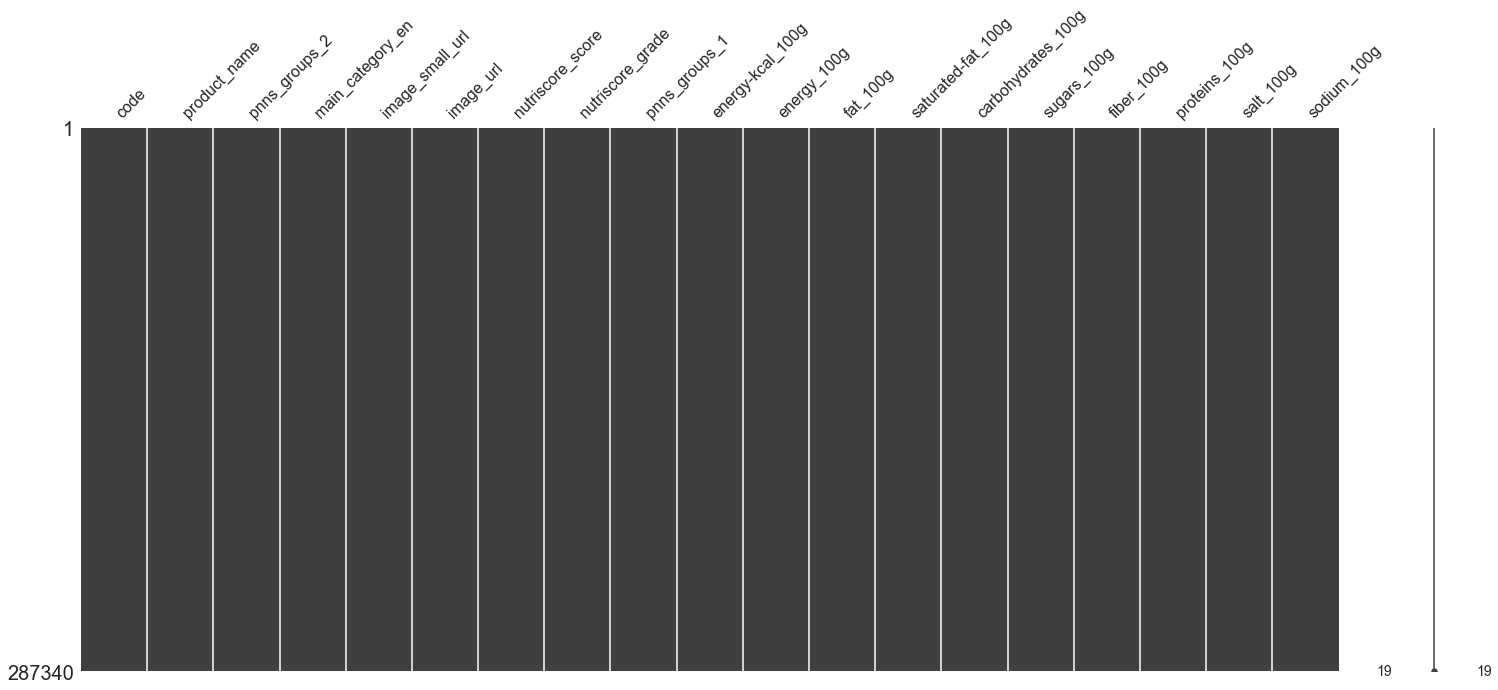

In [381]:
#Visualisation de données manquantes
msno.matrix(data_clean)

In [382]:
#Exportation de jeu de données nettoyées

data_clean.to_csv("data_food_cleaned.csv",header=True,index=False)